In [11]:
import numpy as np

In [12]:
X_data = np.load("X_data_fits.npy")
y_data = np.load("y_data_fits.npy")

In [13]:
from scipy.ndimage.interpolation import rotate, shift, zoom

def rand_jitter(temp):
    copy_of_temp = temp
#     if np.random.random() > .5:
#         copy_of_temp[np.random.randint(0,len(temp),1), :] = 0
#     if np.random.random() > .5:
#         copy_of_temp[:, np.random.randint(0,len(temp),1)] = 0
    if np.random.random() > .5:
        copy_of_temp = shift(copy_of_temp, shift=(np.random.randint(-50,50,2)))
    if np.random.random() > .5:
        copy_of_temp = rotate(copy_of_temp, angle = np.random.randint(-180,180,1), reshape=False)
    return copy_of_temp

In [14]:
new_X_data = np.zeros((X_data.shape[0], 200, 200))

for i in range(len(X_data)):
    new_img = np.pad(X_data[i,:,:], ((50,50),(50,50)), 'constant')
    new_img = rand_jitter(new_img)
    new_X_data[i, :, :] = new_img

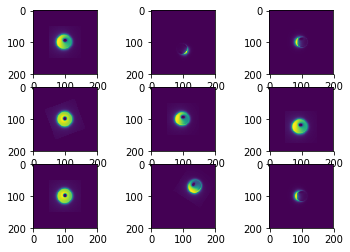

In [15]:
import matplotlib.pyplot as plt
for i in range(1,10):
    ax=plt.subplot(3,3,i)
    new_int = np.random.randint(0,len(new_X_data))
    ax.imshow(new_X_data[new_int,:,:])

In [16]:
np.save("X_data_fits_jitter.npy",new_X_data)